In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_rows', 200)

In [3]:
boston_calendar = pd.read_csv('../project1_supplemental_files/airbnb_data/boston_calendar.csv')
seattle_calendar = pd.read_csv('../project1_supplemental_files/airbnb_data/seattle_calendar.csv')
boston_listings = pd.read_csv('../project1_supplemental_files/airbnb_data/boston_listings.csv')
seattle_listings = pd.read_csv('../project1_supplemental_files/airbnb_data/seattle_listings.csv')
boston_reviews = pd.read_csv('../project1_supplemental_files/airbnb_data/boston_reviews.csv')
seattle_reviews = pd.read_csv('../project1_supplemental_files/airbnb_data/seattle_reviews.csv')

In [4]:
seattle_listings['state'] = 'WA'
boston_listings['state'] = 'MA'

In [5]:
combined_listings = pd.concat([boston_listings, seattle_listings], ignore_index=True)
combined_reviews = pd.concat([boston_reviews, seattle_reviews], ignore_index=True)

In [6]:
combined_listings['price'] = combined_listings['price'].str.replace('$', '').str.replace(',', '').astype('float')

# Comparing host_is_superhost against host_response_rate

In [7]:
super_host_v_response_rate = combined_listings[['state', 'host_is_superhost', 'host_response_rate']].copy()
super_host_v_response_rate['host_response_rate'] = super_host_v_response_rate['host_response_rate'].str.rstrip('%').astype('float')

super_host_v_response_rate['host_response_rate_graded'] = super_host_v_response_rate['host_response_rate'].apply(lambda x: True if x > 80 else False)

super_host_v_response_rate

,state,host_is_superhost,host_response_rate,host_response_rate_graded
0,MA,f,NaN,False
1,MA,f,100.0,True
2,MA,t,100.0,True
3,MA,f,100.0,True
4,MA,t,100.0,True
...,...,...,...,...
7398,WA,f,99.0,True
7399,WA,f,100.0,True
7400,WA,f,NaN,False
7401,WA,f,100.0,True


In [8]:
average_response_rate = super_host_v_response_rate.groupby(['state', 'host_is_superhost'])['host_response_rate_graded'].mean().reset_index()
average_response_rate

,state,host_is_superhost,host_response_rate_graded
0,MA,f,0.758024
1,MA,t,0.980344
2,WA,f,0.728769
3,WA,t,0.933162


# Comparing prices per how many are accommodated

In [9]:
combined_listings['room_type_category'] = combined_listings['room_type'].str.replace('Entire home/apt', 'H').str.replace('Private room', 'R').str.replace('Shared room', 'R')
combined_listings['accommodates_category'] = combined_listings['accommodates'].apply(lambda x: 'S' if x <= 8 else 'L')

In [10]:
# listing_stats = combined_listings \
#                     .groupby(['state', 'accommodates', 'room_type']) \
#                     .agg( count=('id', 'count'), average_price=('price', 'mean'), total_price=('price', 'sum') ) \
#                     .reset_index()

listing_stats = combined_listings \
                    .groupby(['state', 'accommodates_category', 'room_type_category']) \
                    .agg( count=('id', 'count'), average_price=('price', 'mean') ) \
                    .reset_index()

display(listing_stats)

,state,accommodates_category,room_type_category,count,average_price
0,MA,L,H,43,373.581395
1,MA,S,H,2084,224.421305
2,MA,S,R,1458,95.861454
3,WA,L,H,65,378.092308
4,WA,S,H,2476,150.008885
5,WA,S,R,1277,72.525450


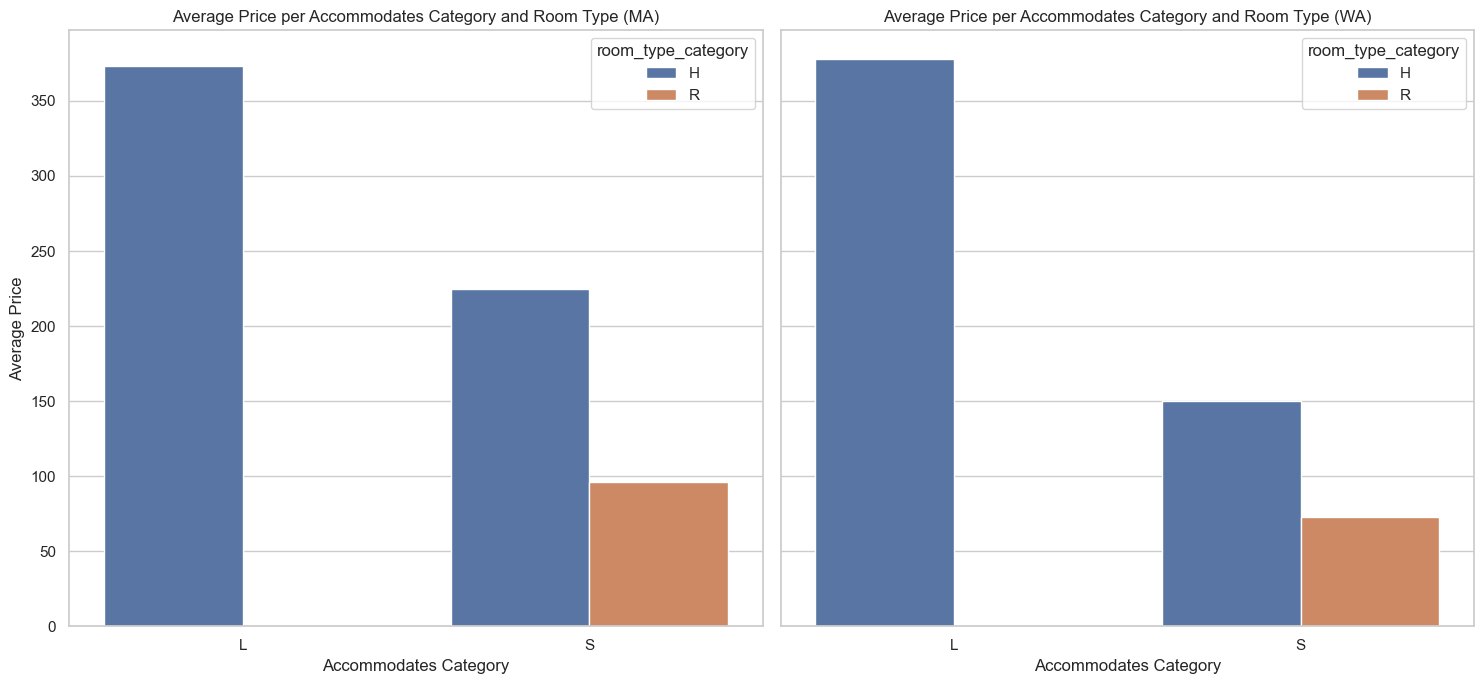

In [11]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_theme(style="whitegrid")

# Create a figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharey=True)

# Plot for Massachusetts (MA)
sns.barplot(ax=axes[0], data=listing_stats[listing_stats['state'] == 'MA'], 
            x='accommodates_category', y='average_price', hue='room_type_category')
axes[0].set_title('Average Price per Accommodates Category and Room Type (MA)')
axes[0].set_xlabel('Accommodates Category')
axes[0].set_ylabel('Average Price')

# Plot for Washington (WA)
sns.barplot(ax=axes[1], data=listing_stats[listing_stats['state'] == 'WA'], 
            x='accommodates_category', y='average_price', hue='room_type_category')
axes[1].set_title('Average Price per Accommodates Category and Room Type (WA)')
axes[1].set_xlabel('Accommodates Category')
axes[1].set_ylabel('Average Price')

# Show the plot
plt.tight_layout()
plt.show()

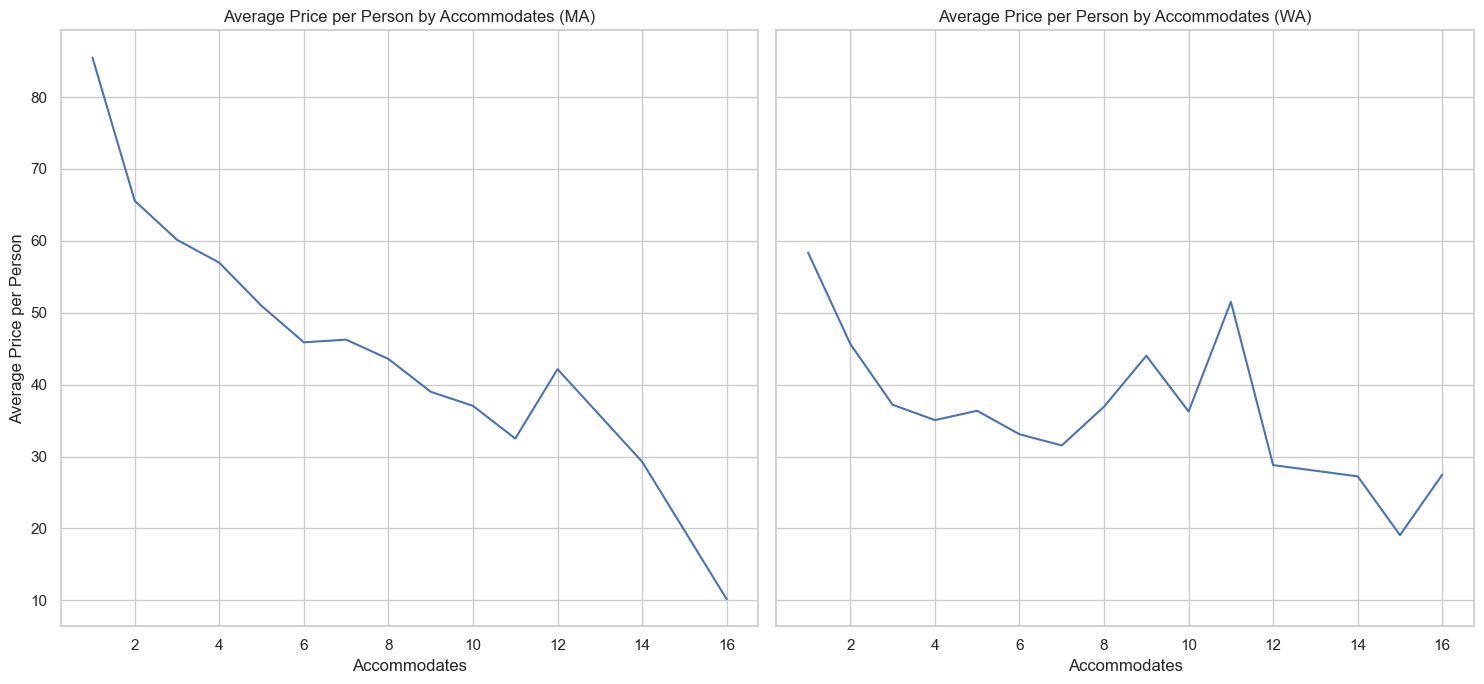

In [12]:
# Calculate price per person
combined_listings['price_per_person'] = combined_listings['price'] / combined_listings['accommodates']

# Group by state and calculate the average price per person
average_price_per_person = combined_listings.groupby(['state', 'accommodates'])['price_per_person'].mean().reset_index()

# Display the result
# display(average_price_per_person)
# Create a figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharey=True)

# Plot for Massachusetts (MA)
sns.lineplot(ax=axes[0], data=average_price_per_person[average_price_per_person['state'] == 'MA'], 
             x='accommodates', y='price_per_person')
axes[0].set_title('Average Price per Person by Accommodates (MA)')
axes[0].set_xlabel('Accommodates')
axes[0].set_ylabel('Average Price per Person')

# Plot for Washington (WA)
sns.lineplot(ax=axes[1], data=average_price_per_person[average_price_per_person['state'] == 'WA'], 
             x='accommodates', y='price_per_person')
axes[1].set_title('Average Price per Person by Accommodates (WA)')
axes[1].set_xlabel('Accommodates')
axes[1].set_ylabel('Average Price per Person')

# Show the plot
plt.tight_layout()
plt.show()

# Average price against superhost status

In [13]:
average_price_per_superhost = combined_listings.groupby(['state', 'host_is_superhost'])['price'].mean().reset_index()
average_price_per_superhost

,state,host_is_superhost,price
0,MA,f,173.604468
1,MA,t,176.434889
2,WA,f,127.391376
3,WA,t,130.140103


# Average price against review_scores_rating

In [14]:
def review_bucketing(rating):
    if pd.isnull(rating):
        return 0
    elif rating >= 90:
        return 4
    elif rating >= 80:
        return 3
    elif rating >= 70:
        return 2
    return 1

def review_grading(rating_bucket):
    if rating_bucket == 4:
        return 'A'
    elif rating_bucket == 3:
        return 'B'
    elif rating_bucket == 2:
        return 'C'
    elif rating_bucket == 1:
        return 'F'
    return 'N/A'

In [15]:
prices_per_rating = combined_listings.copy()

prices_per_rating['review_scores_rating_bucket'] = prices_per_rating['review_scores_rating'].apply(review_bucketing)

prices_per_rating = prices_per_rating \
                        .groupby(['state', 'review_scores_rating_bucket', 'host_is_superhost']) \
                        .agg(count=('id', 'count'), average_price=('price', 'mean')) \
                        .reset_index() \
                        .sort_values(by=['state', 'review_scores_rating_bucket', 'host_is_superhost'], ascending=False)

prices_per_rating['grade'] = prices_per_rating['review_scores_rating_bucket'].apply(review_grading)

display(
    prices_per_rating#[['state', 'grade', 'host_is_superhost', 'average_price']]
)

# prices_per_rating.to_excel('prices_per_rating.xlsx', index=False)

,state,review_scores_rating_bucket,host_is_superhost,count,average_price,grade
17,WA,4,t,746,127.851206,A
16,WA,4,f,1999,128.084542,A
15,WA,3,t,4,97.500000,B
14,WA,3,f,352,117.815341,B
13,WA,2,f,42,121.238095,C
12,WA,1,t,1,80.000000,F
11,WA,1,f,27,134.814815,F
10,WA,0,t,27,200.074074,N/A
9,WA,0,f,618,130.697411,N/A
8,MA,4,t,387,174.046512,A


# Superhost status vs Host response rate and reviews rating

In [16]:
def response_rate_bucketing(response_rate):
    if pd.isnull(response_rate):
        return 0
    elif response_rate >= 90:
        return 4
    elif response_rate >= 80:
        return 3
    elif response_rate >= 70:
        return 2
    return 1

def response_rate_grading(response_rate):
    if response_rate == 4:
        return 'A'
    elif response_rate == 3:
        return 'B'
    elif response_rate == 2:
        return 'C'
    elif response_rate == 1:
        return 'F'
    return 'N/A'

In [17]:
super_host_v_response_rate = combined_listings[['id', 'state', 'host_is_superhost', 'host_response_rate', 'review_scores_rating', 'price']].copy()
super_host_v_response_rate['host_response_rate'] = super_host_v_response_rate['host_response_rate'].str.rstrip('%').astype('float')

# super_host_v_response_rate['host_response_rate_graded'] = super_host_v_response_rate['host_response_rate'].apply(response_rate_bucketing)

# super_host_v_response_rate['review_scores_rating_bucket'] = super_host_v_response_rate['review_scores_rating'].apply(review_bucketing)

super_host_v_response_rate = super_host_v_response_rate \
                                .groupby(['state', 'host_is_superhost']) \
                                .agg(count=('id', 'count'), average_response_rating=('host_response_rate', 'mean'), average_review_rating=('review_scores_rating', 'mean')) \
                                .reset_index() \
                                .sort_values( by=['state', 'average_response_rating', 'average_review_rating', 'host_is_superhost'], ascending=False )

# super_host_v_response_rate['grade'] = super_host_v_response_rate['review_scores_rating_bucket'].apply(review_grading)
# super_host_v_response_rate['grade'] = super_host_v_response_rate['review_scores_rating_bucket'].apply(response_rate_grading)

display(super_host_v_response_rate)

,state,host_is_superhost,count,average_response_rating,average_review_rating
3,WA,t,778,98.263087,97.395473
2,WA,f,3038,93.900392,93.652893
1,MA,t,407,99.323383,97.076142
0,MA,f,3178,94.346608,91.061817


# Compare response rate vs reviews

In [18]:
review_v_response_rate = combined_listings[['id', 'state', 'host_response_rate', 'review_scores_rating']].copy()
review_v_response_rate['host_response_rate'] = review_v_response_rate['host_response_rate'].str.rstrip('%').astype('float')

review_v_response_rate['response_review_diff'] = review_v_response_rate['host_response_rate'] - review_v_response_rate['review_scores_rating']

review_v_response_rate['host_response_rate_graded'] = review_v_response_rate['host_response_rate'].apply(response_rate_bucketing)

review_v_response_rate['review_scores_rating_bucket'] = review_v_response_rate['review_scores_rating'].apply(review_bucketing)

review_v_response_rate['response_review_bucket_diff'] = review_v_response_rate['host_response_rate_graded'] - review_v_response_rate['review_scores_rating_bucket']

review_v_response_rate['has_diff'] = review_v_response_rate['response_review_diff'].apply(lambda x: 1 if x != 0 else 0)

display( review_v_response_rate )

,id,state,host_response_rate,review_scores_rating,response_review_diff,host_response_rate_graded,review_scores_rating_bucket,response_review_bucket_diff,has_diff
0,12147973,MA,NaN,NaN,NaN,0,0,0,1
1,3075044,MA,100.0,94.0,6.0,4,4,0,1
2,6976,MA,100.0,98.0,2.0,4,4,0,1
3,1436513,MA,100.0,100.0,0.0,4,4,0,0
4,7651065,MA,100.0,99.0,1.0,4,4,0,1
...,...,...,...,...,...,...,...,...,...
7398,8101950,WA,99.0,80.0,19.0,4,3,1,1
7399,8902327,WA,100.0,100.0,0.0,4,4,0,0
7400,10267360,WA,NaN,NaN,NaN,0,0,0,1
7401,9604740,WA,100.0,NaN,NaN,4,0,4,1


# Joining review content to listings

In [19]:
# Merge the reviews with the listings on the 'id' and 'listing_id' columns
merged_data = pd.merge(combined_listings, combined_reviews, left_on='id', right_on='listing_id', how='left')
merged_data = merged_data[['id_x', 'review_scores_value', 'comments']]

# Display the merged data
merged_data = merged_data[ ( merged_data['review_scores_value'].isna() ) & ~( merged_data['comments'].isna() ) ]

# Comparing accommodated vs price to try and guess what the price would be per accommodated

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [24]:
df = combined_listings[ [ 'host_is_superhost', 'host_response_rate', 'review_scores_rating', 'accommodates', 'price' ] ].copy()
df['host_is_superhost'] = df['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float')
df = df.dropna()

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y)

lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)

y_test_preds = lm_model.predict(X_test)

print("The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test)))

TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'

In [22]:
y_test

7266     99.0
5652     80.0
832     236.0
2712     60.0
6944    195.0
        ...  
3632    110.0
2350    180.0
4713     82.0
6167     95.0
2907     65.0
Name: price, Length: 1353, dtype: float64

In [23]:
y_test_preds

array([105.77947783, 110.32182495, 290.82113002, ..., 103.47519894,
       106.45751937, 103.8371752 ])